In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import defaultdict
import collections

In [140]:
def readFile(filename):
    player2SimpleQl_x = [1]
    player2SimpleQl_y = [0.33]
    with open(filename) as f:
        content = f.readlines()
        for line in content:
            if 'iterations:' in line:
                lineList = line.rstrip().split(' ')
                player2SimpleQl_x += [int(lineList[0])]
                player2SimpleQl_y+= [float(lineList[-1])]
    return player2SimpleQl_x, player2SimpleQl_y

In [144]:
filename = './q_learning/win_rates_random_3.txt'
Ql_x, Ql_y = readFile(filename)

In [145]:
filename = './feature_learning/win_rates_feature_3_random_.txt'
feature_x, feature_y = readFile(filename)

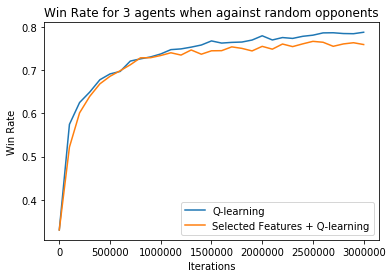

In [146]:
plt.plot(Ql_x, Ql_y,label='Q-learning')
plt.plot(feature_x,feature_y,label='Selected Features + Q-learning')
plt.title('Win Rate for 3 agents when against random opponents')
plt.xlabel('Iterations')
plt.ylabel('Win Rate')
first_legend = plt.legend()
plt.show()

In [138]:
def plot_bar(data):
    actionMap = defaultdict(int)
    for i in data.items():
        action = i[0][1][0]
        actionMap[action]+=1 
    actionMap = collections.OrderedDict(sorted(actionMap.items()))
    print('Total states:', np.sum(list(actionMap.values())))
    # Make a fake dataset:
    height = list(actionMap.values())
    bars = list(actionMap.keys())
    y_pos = np.arange(len(bars))
    # Create bars
    plt.bar(y_pos, height) 
    # Create names on the x-axis
    plt.xticks(y_pos, bars)
    plt.xticks(rotation=90)
    plt.title('Action frequency of policy by Q-learning (2 Agents against simple strategy)')
    plt.xlabel('Action')
    plt.ylabel('Frequency') 
    # Show graphic
    plt.show()

Total states: 184364


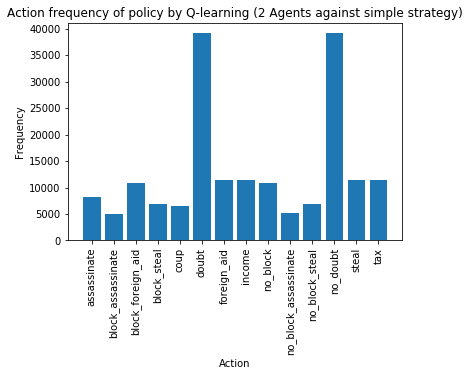

In [139]:
file = open('./q_learning/q_data_simple_2_150000', 'rb')
# dump information to that file
data = pickle.load(file)
# close the file
file.close()
plot_bar(data)